# AlertAI - Data Pre-Processing 
This notebook is responsible for the development of the data prepocessing unit that will in de future be integrated in the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Data Preparation
4. Re-Write processed Data

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import shuffle

## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [2]:
data = pd.read_csv("data/raw_data.csv") 
data.head()

,sensors.id,sensors.carId,sensors.carLocation,sensors.timeValue,sensors.pm25,sensors.pm10,sensors.temperature,sensors.gas,sensors.humidity,sensors.pressure,sensors.altitude,sensors.tags,sensors.classification
0,2213,VP-35-44,41.5608 -8.3968,2020-12-07 13:30:07,661.4,1334.4,22.017695,26584,55.019330,1011.466474,14.859670,"Existência de fumo, janelas abertas, AC desligado",1
1,2212,VP-35-44,41.5608 -8.3968,2020-12-07 13:30:02,391.3,514.1,22.019258,25556,55.320447,1011.484612,14.708438,"Existência de fumo, janelas abertas, AC desligado",1
2,2211,VP-35-44,41.5608 -8.3968,2020-12-07 13:29:56,391.3,514.1,22.019648,24783,55.192396,1011.495633,14.616552,"Existência de fumo, janelas abertas, AC desligado",1
3,2210,VP-35-44,41.5608 -8.3968,2020-12-07 13:29:51,391.3,514.1,22.017109,22864,55.230475,1011.505291,14.536031,"Existência de fumo, janelas abertas, AC desligado",1
4,2209,VP-35-44,41.5608 -8.3968,2020-12-07 13:29:45,391.3,514.1,22.013594,22198,55.095559,1011.501234,14.569858,"Existência de fumo, janelas abertas, AC desligado",1


## 3. Data Pre-processing
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Null Values Verification & Elimination

Here we are going to validate the datasets: checking if there are missing values and try to avoid them: deleting or replace them for the most common values of the respectively feature

In [3]:
#Missing values verification for whole dataset
nullValues = data.isnull().values.sum()

print("Missing values on dataset: ",nullValues)

Missing values on dataset:  0


In [4]:
#Missing values for each feature
print("---------Dataset ------------")
print(data.isnull().sum())

---------Dataset ------------
sensors.id                0
sensors.carId             0
sensors.carLocation       0
sensors.timeValue         0
sensors.pm25              0
sensors.pm10              0
sensors.temperature       0
sensors.gas               0
sensors.humidity          0
sensors.pressure          0
sensors.altitude          0
sensors.tags              0
sensors.classification    0
dtype: int64


In [5]:
#Describe the dataset for more realistic informations about features
print(data.describe(include='all'))

         sensors.id sensors.carId sensors.carLocation    sensors.timeValue  \
count   2062.000000          2062                2062                 2062   
unique          NaN             2                   1                 2056   
top             NaN      VP-35-44     41.5608 -8.3968  2020-12-03 18:57:22   
freq            NaN          1307                2062                    2   
mean    1136.054316           NaN                 NaN                  NaN   
std      640.985206           NaN                 NaN                  NaN   
min        1.000000           NaN                 NaN                  NaN   
25%      635.250000           NaN                 NaN                  NaN   
50%     1167.500000           NaN                 NaN                  NaN   
75%     1682.750000           NaN                 NaN                  NaN   
max     2213.000000           NaN                 NaN                  NaN   

        sensors.pm25  sensors.pm10  sensors.temperature   senso

### 3.2 NaN Verification & Elimination

In this subsection we are going to verify the existance of NaN values. Tipically, they can cause some troubles 
ahead - so it is important to handle them now

In [6]:
NaN = data.isna().sum()
print("NAN Finder: \n Total: %s " % (NaN.sum()))

NAN Finder: 
 Total: 0 


Lets drop all the Nan Found 

In [7]:
dataClean = data.dropna()
print("Dataset: \n Antes -> %s \n Depois %s " % (data.shape[0],dataClean.shape[0]))
print("Foram removidos: %s" % (data.shape[0]-dataClean.shape[0]))

Dataset: 
 Antes -> 2062 
 Depois 2062 
Foram removidos: 0


Finally, we present a brief visual representation of how our datasets are composed in termos of unwanted values

In [8]:
#Assign the same variables for not making mistakes further
data = dataClean

Dataset Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sensors.id              2062 non-null   int64  
 1   sensors.carId           2062 non-null   object 
 2   sensors.carLocation     2062 non-null   object 
 3   sensors.timeValue       2062 non-null   object 
 4   sensors.pm25            2062 non-null   float64
 5   sensors.pm10            2062 non-null   float64
 6   sensors.temperature     2062 non-null   float64
 7   sensors.gas             2062 non-null   int64  
 8   sensors.humidity        2062 non-null   float64
 9   sensors.pressure        2062 non-null   float64
 10  sensors.altitude        2062 non-null   float64
 11  sensors.tags            2062 non-null   object 
 12  sensors.classification  2062 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 225.5+ KB


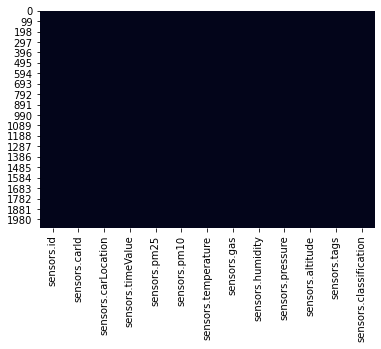

In [9]:
print("Dataset Information")
sns.heatmap(data.isnull(), cbar=False)
data.info()

### Improve Data Quality

In this subsection, we are going to promote some methods in order to improve data quality and remove some unwanted values

In [10]:
improvedData = data
print(improvedData.shape)
improvedData.describe()

(2062, 13)


,sensors.id,sensors.pm25,sensors.pm10,sensors.temperature,sensors.gas,sensors.humidity,sensors.pressure,sensors.altitude,sensors.classification
count,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000
mean,1136.054316,117.527595,214.628904,19.857099,44480.184772,51.938321,993.712608,165.037388,0.258002
std,640.985206,224.549996,430.313936,3.925808,16224.591247,10.679446,17.763115,150.585883,0.437641
min,1.000000,0.000000,0.000000,10.512617,3841.000000,25.600421,955.262052,-59.780313,0.000000
25%,635.250000,2.700000,8.000000,17.579805,31695.500000,44.228510,974.939600,17.856244,0.000000
50%,1167.500000,8.000000,13.200000,19.872969,49824.000000,51.526091,995.048167,152.656918,0.000000
75%,1682.750000,40.975000,66.800000,22.628437,58644.000000,60.078748,1011.107119,323.957047,1.000000
max,2213.000000,999.900000,1999.900000,27.949531,69055.000000,72.686949,1020.450858,494.377666,1.000000


In [11]:
improvedData.drop(improvedData.loc[improvedData['sensors.pm25']<=1].index, inplace=True)

In [12]:
print(improvedData.shape)
improvedData.describe()

(2018, 13)


,sensors.id,sensors.pm25,sensors.pm10,sensors.temperature,sensors.gas,sensors.humidity,sensors.pressure,sensors.altitude,sensors.classification
count,2018.000000,2018.00000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,1131.960852,120.07448,219.266204,19.786008,44573.355798,52.064625,993.868340,163.712064,0.261645
std,642.992153,226.31507,433.821538,3.926293,16267.596367,10.734241,17.699520,150.017171,0.439639
min,1.000000,1.10000,1.700000,10.512617,3841.000000,25.600421,955.262052,-59.780313,0.000000
25%,630.250000,2.90000,8.300000,17.489424,31560.250000,44.260450,975.006302,17.023131,0.000000
50%,1163.500000,8.10000,13.400000,19.788984,50394.000000,51.895657,994.980717,153.226805,0.000000
75%,1689.750000,46.60000,90.700000,22.493867,58697.000000,60.308551,1011.207017,323.384120,1.000000
max,2213.000000,999.90000,1999.900000,27.949531,69055.000000,72.686949,1020.450858,494.377666,1.000000


##### Define 0 and 1 classification gap

In [13]:
improvedData.drop(improvedData.loc[(improvedData['sensors.pm25']>=45)  & (improvedData['sensors.classification']==0)].index, inplace=True)

In [14]:
improvedData.describe()

,sensors.id,sensors.pm25,sensors.pm10,sensors.temperature,sensors.gas,sensors.humidity,sensors.pressure,sensors.altitude,sensors.classification
count,2018.000000,2018.00000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,1131.960852,120.07448,219.266204,19.786008,44573.355798,52.064625,993.868340,163.712064,0.261645
std,642.992153,226.31507,433.821538,3.926293,16267.596367,10.734241,17.699520,150.017171,0.439639
min,1.000000,1.10000,1.700000,10.512617,3841.000000,25.600421,955.262052,-59.780313,0.000000
25%,630.250000,2.90000,8.300000,17.489424,31560.250000,44.260450,975.006302,17.023131,0.000000
50%,1163.500000,8.10000,13.400000,19.788984,50394.000000,51.895657,994.980717,153.226805,0.000000
75%,1689.750000,46.60000,90.700000,22.493867,58697.000000,60.308551,1011.207017,323.384120,1.000000
max,2213.000000,999.90000,1999.900000,27.949531,69055.000000,72.686949,1020.450858,494.377666,1.000000


In [15]:
improvedData.drop(improvedData.loc[(improvedData['sensors.pm25']<=150)  & (improvedData['sensors.classification']==1)].index, inplace=True)

In [16]:
improvedData.describe()

,sensors.id,sensors.pm25,sensors.pm10,sensors.temperature,sensors.gas,sensors.humidity,sensors.pressure,sensors.altitude,sensors.classification
count,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000
mean,1116.352255,121.430461,222.084136,19.808141,45049.966548,51.956196,993.524898,166.616997,0.244805
std,640.219017,228.629902,438.284393,3.955604,15995.270862,10.786768,17.697935,150.008462,0.430080
min,1.000000,1.100000,1.700000,10.512617,3841.000000,25.600421,955.262052,-59.780313,0.000000
25%,621.000000,2.800000,8.200000,17.486250,32028.000000,44.173428,974.928844,17.918659,0.000000
50%,1143.000000,8.000000,13.200000,19.791719,51664.000000,51.677465,994.653626,155.990846,0.000000
75%,1637.000000,39.100000,49.000000,22.621406,58839.000000,60.343820,1011.099635,324.049438,0.000000
max,2213.000000,999.900000,1999.900000,27.949531,69055.000000,72.686949,1020.450858,494.377666,1.000000


In [17]:
data = improvedData

### 3.3 Outliers

Here we are going to check if there are any outlier in our dataframes, and handle with them 

Text(0.5, 1.0, 'PM 25 BoxPlot')

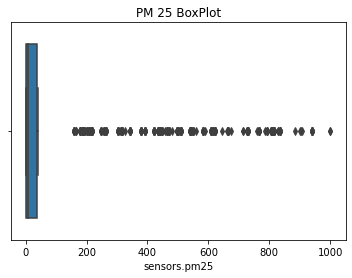

In [18]:
sns.boxplot(x=data['sensors.pm25']).set_title('PM 25 BoxPlot')

Text(0.5, 1.0, 'PM 10 BoxPlot')

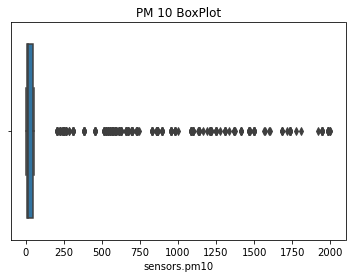

In [19]:
sns.boxplot(x=data['sensors.pm10']).set_title('PM 10 BoxPlot')

Text(0.5, 1.0, 'Temperature BoxPlot')

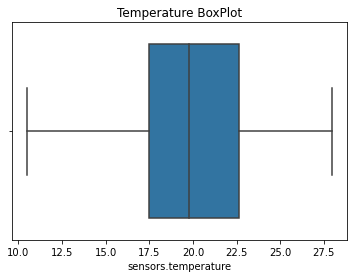

In [20]:
sns.boxplot(x=data['sensors.temperature']).set_title('Temperature BoxPlot')

Text(0.5, 1.0, 'Gas BoxPlot')

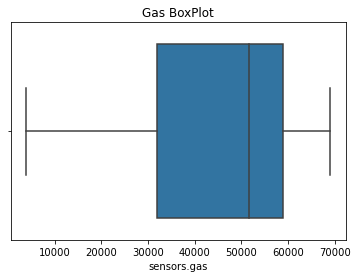

In [21]:
sns.boxplot(x=data['sensors.gas']).set_title('Gas BoxPlot')

Text(0.5, 1.0, 'Humidity BoxPlot')

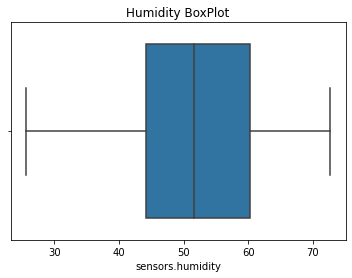

In [22]:
sns.boxplot(x=data['sensors.humidity']).set_title('Humidity BoxPlot')

Text(0.5, 1.0, 'Pressure BoxPlot')

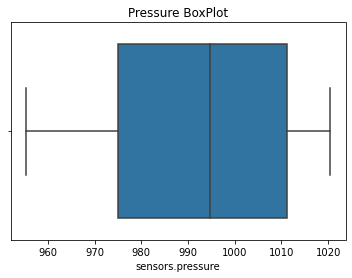

In [23]:
sns.boxplot(x=data['sensors.pressure']).set_title('Pressure BoxPlot')

Text(0.5, 1.0, 'Altitude BoxPlot')

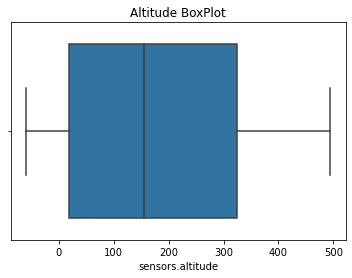

In [24]:
sns.boxplot(x=data['sensors.altitude']).set_title('Altitude BoxPlot')

#### Assign features only

Feature altitude was deleted because it was giving negative values

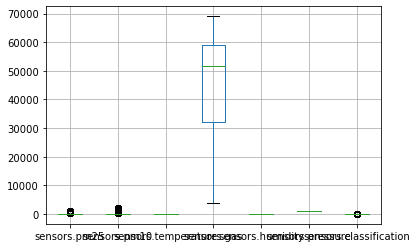

In [25]:
features = data[['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure','sensors.classification']]
features.boxplot()

Now that we have spotted some outliers, its time to get rid of them

#### Z-score method

In [138]:
z = np.abs(stats.zscore(features))
print(z)

[[3.85914793 3.69401374 1.44166969 ... 1.35436888 1.359603   4.18568991]
 [5.39597235 5.43043055 1.443897   ... 1.3547722  1.36001546 4.18568991]
 [4.92768612 4.95097218 1.44712275 ... 1.35540971 1.36066742 4.18568991]
 ...
 [0.2202593  0.21807419 0.09402166 ... 0.9321148  0.9317654  0.23890924]
 [0.2202593  0.21807419 0.07950575 ... 0.93190089 0.93155529 0.23890924]
 [0.2202593  0.21807419 0.06925245 ... 0.93238659 0.93203236 0.23890924]]


In [139]:
threshold = 3
print(np.where(z > threshold))

(array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11,
       11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 16, 17, 17, 17, 18, 18,
       18, 19, 20, 20, 20, 21, 21, 22, 23, 24]), array([0, 1, 7, 0, 1, 7, 0, 1, 7, 0, 1, 7, 0, 1, 7, 0, 1, 7, 0, 1, 7, 0,
       7, 0, 1, 7, 0, 1, 7, 0, 1, 7, 0, 1, 7, 0, 1, 7, 0, 1, 7, 0, 1, 7,
       7, 7, 0, 1, 7, 0, 1, 7, 7, 0, 1, 7, 1, 7, 7, 7, 7]))


In [141]:
abs_z_scores = np.abs(z)
filtered_entries = (abs_z_scores < threshold).all(axis=1)
print("ANTES DE REMOVER: ",features.shape)
featuresZ = features[filtered_entries]
print("DEPOIS DE REMOVER: ",featuresClean.shape)
print("Removidos: ", features.shape[0]-featuresClean.shape[0])

ANTES DE REMOVER:  (463, 8)
DEPOIS DE REMOVER:  (438, 8)
Removidos:  25


#### IRQ method

In [142]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sensors.pm25                  4.150000
sensors.pm10                  4.750000
sensors.temperature          10.608203
sensors.gas               20496.000000
sensors.humidity             21.707457
sensors.pressure             42.604216
sensors.altitude            359.861651
sensors.classification        0.000000
dtype: float64


In [143]:
featuresIQR = features[~((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]
print("ANTES DE REMOVER: ", features.shape)
print("DEPOIS DE REMOVER: ", featuresIQR.shape)
print("Removidos: ", features.shape[0]- featuresIQR.shape[0])
#particles = particlesNow

ANTES DE REMOVER:  (463, 8)
DEPOIS DE REMOVER:  (376, 8)
Removidos:  87


#### Assing Variables Without Outliers

Here we have to assign the datasets WITHOUT OUTLIERS, in order to proceeed to normalization and standarization with correct values. We are going to use IQR since this is removing more data

In [144]:
data = featuresIQR
data.shape

(376, 8)

In [148]:
features = featuresIQR

### 3.4 Normalização

In [26]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Create the Scaler
minmax = pd.DataFrame(scaler.fit_transform(features.values), columns=features.columns, index=features.index)
minmax.head()
minmax.shape

(1973, 7)

### 3.5 Standarização

In [27]:
# Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Create Scaler
standard = pd.DataFrame(scaler.fit_transform(features.values), columns=features.columns, index=features.index)
standard.head()
standard.shape

(1973, 7)

## 4. Create clean data files
The last step of the task is save the previous cleaned data, so that it can be used in the future.

Save data without outliers into 2 different files: normalized and standarized

##### Clean Data

In [28]:
data = features

In [29]:
#Save clean csv
data.to_csv('data/data.csv',index=False)

#### Normalized -> MinMax

In [30]:
#Save normalized csv 
minmax.to_csv('data/minmax.csv',index=False)

#### Standarized -> Standard Scaler

In [31]:
#Save standarized csv
standard.to_csv('data/standarized.csv',index=False)